In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from itertools import combinations
from models.helpers import read_from_csv, discretize, result_to_df, calculate_rates_directed, calculate_rates_undirected
from plots.plots import plot_data, plot_result_directed, plot_result_undirected, plot_roc_curve
from models.random_model import random_model, random_model_roc_values
from models.correlation_model import correlation_model, correlation_model_roc_values
from models.aracne_model import aracne_model, aracne_model_roc_values
from models.greedy_hillclimbing import greedy_hillclimbing, hillclimbing_model_roc_values
from sklearn.linear_model import LinearRegression
%load_ext autoreload
%autoreload 2

In [2]:
# read raw data from CSV file:
gene_df = read_from_csv('gene-data.csv')

# discretize data into 5 bins of gene-specific limits:
gene_df_disc = discretize(gene_df,5)

# true network structure:
# ground_truth[i,j]=1 -> directed edge between gene i and gene j
ground_truth = result_to_df(np.array([[0,1,0,0,0],
                                      [0,0,1,0,0],
                                      [0,0,0,0,1],
                                      [0,0,0,0,0],
                                      [1,1,0,1,0]]))

In [3]:
gene_df.head()
#gene_df_disc.head()

,ASH1,CBF1,GAL4,GAL80,SWI5
time,,,,,
0,0.1033,0.0419,0.0207,0.0225,0.0760
10,0.0462,0.0365,0.0122,0.0175,0.0186
20,0.0439,0.0514,0.0073,0.0165,0.0090
30,0.0371,0.0473,0.0079,0.0147,0.0117
40,0.0475,0.0482,0.0084,0.0145,0.0088


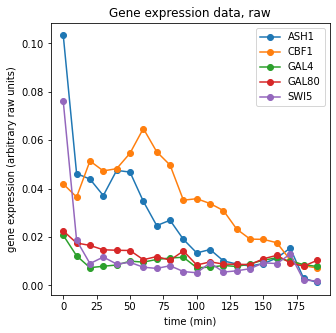

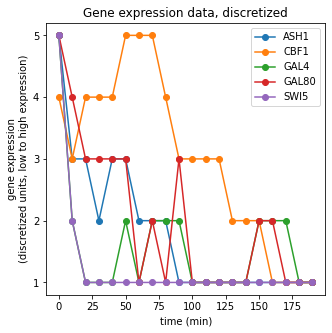

In [4]:
plot_data(gene_df, discr=False)
plot_data(gene_df_disc, discr=True)

In [5]:
corr_mat = correlation_model(gene_df, 0.75)

directed TPR = 0.333 and FPR = 0.211


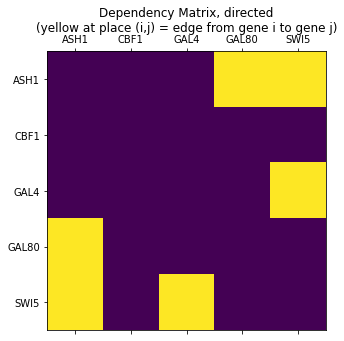

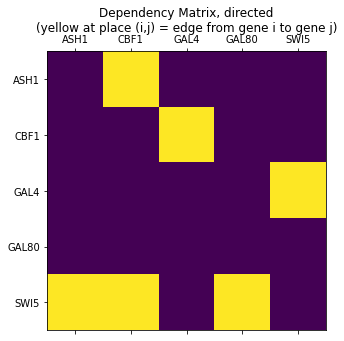

In [6]:
plot_result_directed(corr_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=corr_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

undirected TPR = 0.333 and FPR = 0.154


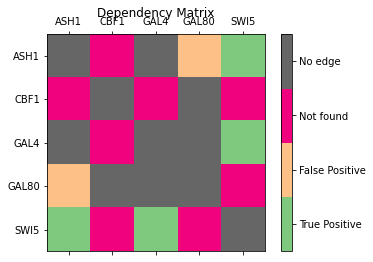

In [9]:
plot_result_undirected(corr_mat, ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=corr_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [10]:
random_mat = random_model(threshold=0.5)
# random_mat = random_model(n_edges=6)

directed TPR = 0.417 and FPR = 0.462


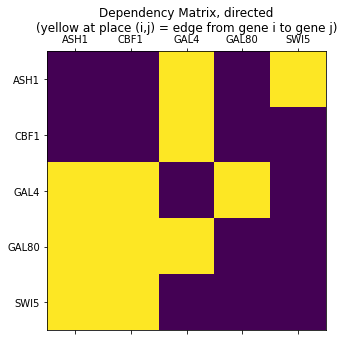

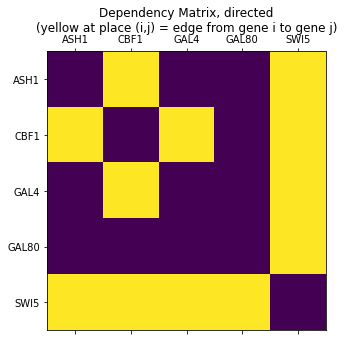

In [11]:
plot_result_directed(random_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

directed TPR = 0.417 and FPR = 0.462


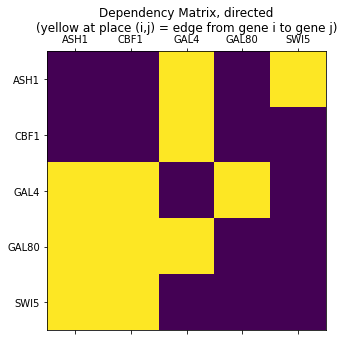

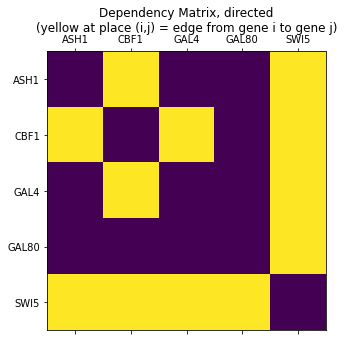

In [12]:
plot_result_directed(random_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
aracne_mat = aracne_model(gene_df, discr_bins=5, threshold=0.5, remove=True)

plot_result_undirected(aracne_mat)
plot_result_undirected(ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=aracne_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [ ]:
aracne_mat = aracne_model(gene_df, discr_bins=5, threshold=0.5, remove=False)


undirected TPR = 0.833 and FPR = 0.154


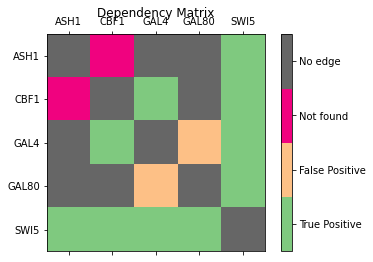

In [21]:
greedy_mat = greedy_hillclimbing(gene_df, iterations=7)
plot_result_undirected(greedy_mat, ground_truth)
#plot_result_undirected(ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=greedy_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [41]:
roc_random = random_model_roc_values(df_truth=ground_truth, threshold_min=0, threshold_max=1, repetitions=100)
roc_correlation = correlation_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1)
roc_aracne1 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_greedy = hillclimbing_model_roc_values(df_data=gene_df, df_truth=ground_truth, iterations_min=1, iterations_max=15)

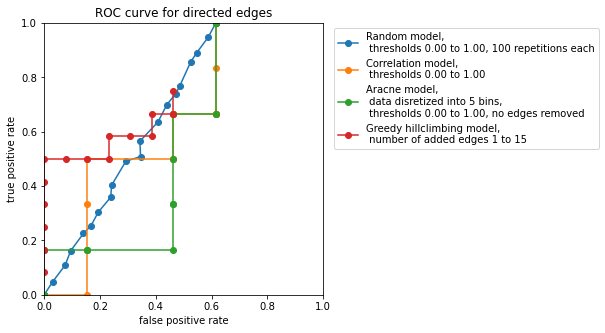

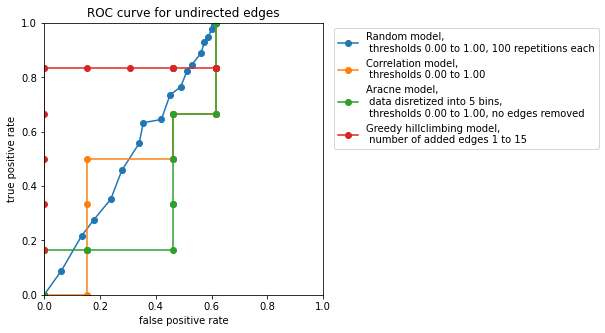

In [42]:
plot_roc_curve([roc_random, roc_correlation, roc_aracne1, roc_greedy], directed=True)
plot_roc_curve([roc_random, roc_correlation, roc_aracne1, roc_greedy], directed=False)

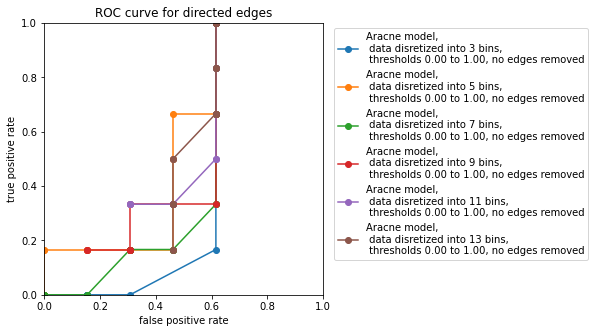

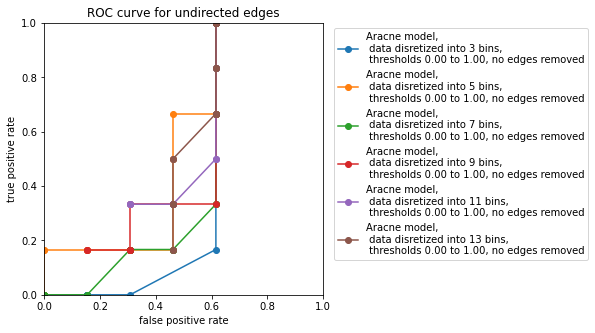

In [32]:
roc_aracne1 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=3, remove_edge_from_triplet=False)
roc_aracne2 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne3 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=7, remove_edge_from_triplet=False)
roc_aracne4 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=9, remove_edge_from_triplet=False)
roc_aracne5 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=11, remove_edge_from_triplet=False)
roc_aracne6 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=13, remove_edge_from_triplet=False)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=True)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=False)

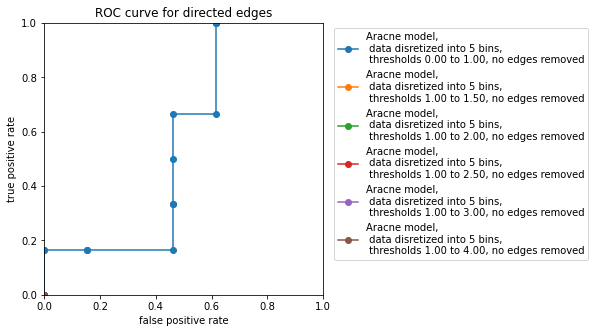

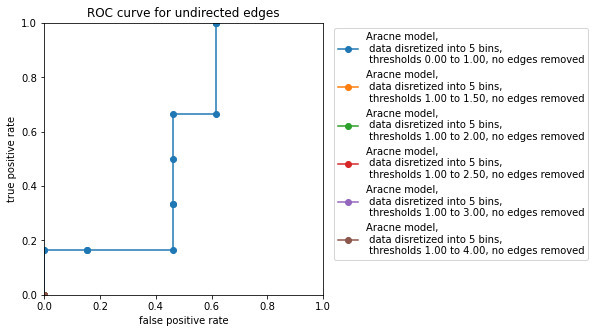

In [34]:
roc_aracne1 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne2 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=1, threshold_max=1.5, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne3 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=1, threshold_max=2, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne4 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=1, threshold_max=2.5, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne5 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=1, threshold_max=3, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne6 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=1, threshold_max=4, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=True)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=False)

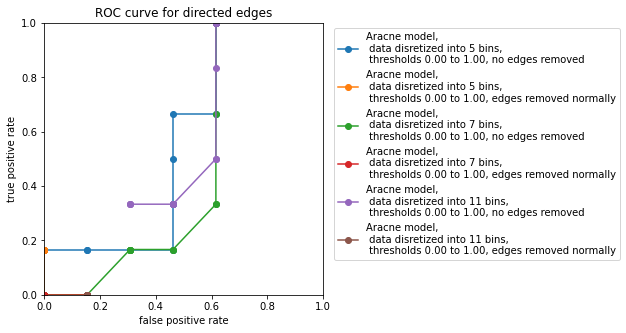

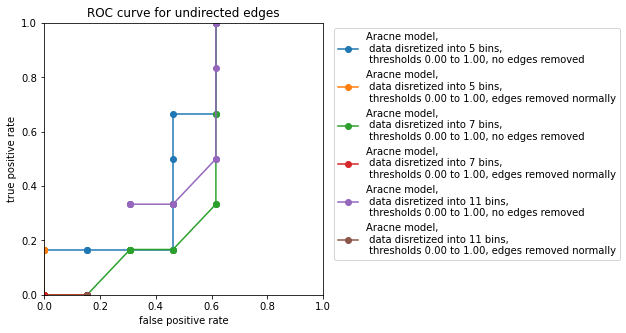

In [35]:
roc_aracne1 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=5, remove_edge_from_triplet=False)
roc_aracne2 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=5, remove_edge_from_triplet=True)
roc_aracne3 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=7, remove_edge_from_triplet=False)
roc_aracne4 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=7, remove_edge_from_triplet=True)
roc_aracne5 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=11, remove_edge_from_triplet=False)
roc_aracne6 = aracne_model_roc_values(df_data=gene_df, df_truth=ground_truth, threshold_min=0, threshold_max=1, 
                                      bins_for_discretization=11, remove_edge_from_triplet=True)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=True)
plot_roc_curve([roc_aracne1, roc_aracne2, roc_aracne3, roc_aracne4, roc_aracne5, roc_aracne6], directed=False)

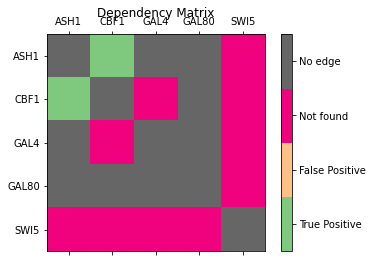

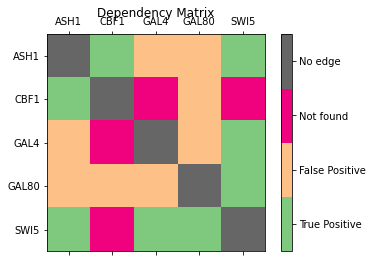

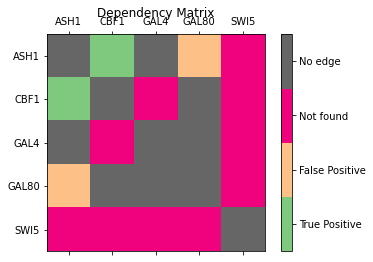

In [40]:
aracne_mat1 = aracne_model(gene_df, discr_bins=5, threshold=0.15, remove=True)
aracne_mat2 = aracne_model(gene_df, discr_bins=5, threshold=0.15, remove=False)
aracne_mat3 = aracne_model(gene_df, discr_bins=5, threshold=0.5, remove=False)
plot_result_undirected(aracne_mat1, ground_truth)
plot_result_undirected(aracne_mat2, ground_truth)
plot_result_undirected(aracne_mat3, ground_truth)

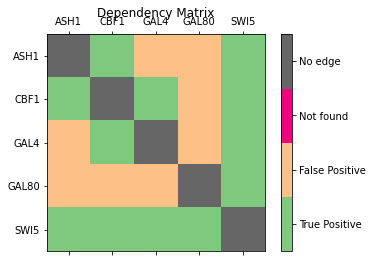

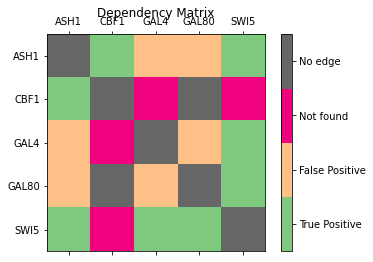

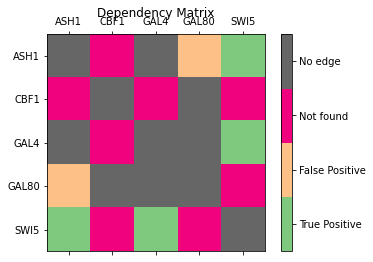

In [45]:
corr_mat1 = correlation_model(gene_df, 0.1)
corr_mat2 = correlation_model(gene_df, 0.5)
corr_mat3 = correlation_model(gene_df, 0.75)
plot_result_undirected(corr_mat1, ground_truth)
plot_result_undirected(corr_mat2, ground_truth)
plot_result_undirected(corr_mat3, ground_truth)